## Introduction
In this case study, we are working for a fictional company, Cyclistic and  have performed data analysis process: ask, prepare, process, analyze, share and act in order to answer key business questions.

## Scenario 
I'm a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, our team will design a new marketing strategy to convert casual riders into annual members.

## Phase 1: Ask
#### Business Task:
Questions that needed to be answered are:

* How do annual members and casual riders use Cyclistic bikes differently?
* Why would casual riders buy Cyclistic annual memberships?
* How can Cyclistic use digital media to influence casual riders to become members?


## Phase 2: Prepare
#### Where is your data located?
The data is provided by Motivate International Inc. and can be accessed by clicking the link [here](https://divvy-tripdata.s3.amazonaws.com/index.html).


#### How is the data organized?
The data is organised in CSV files. These files contains monthly data. We have used data from January, 2023 to June, 2023. The csv file contains 13 columns which provide data on ride id, rideable type, started at, ended at, start station name, start station id, end station name, end station id, start lat,start lng, end lat, end lng and member casual.


#### How are you addressing licensing, privacy, security, and accessibility?
The data has been made available by Motivate International Inc. under this [license](https://www.divvybikes.com/data-license-agreement). For privacy issue, each rider have been assigned rider id and name is not mentioned.


#### How does it help you answer your questions?
The data is collected in a way that is helpful for the analysis. So, all the columns are being used for getting some useful insights. 


#### Are there any problems with the data?
Some of the columns contains too many missing values. So, if there are too many missing values in a column, the column is removed as it wouldn't give accurate analysis.

In [1]:
#### All the steps done in the PREPARE process are provided below:

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings

# Turn off all warnings
warnings.filterwarnings("ignore")


# Loading the csv files and creating data frames
jan_2023 = pd.read_csv("/kaggle/input/cyclistic-jan-23-to-june-23/202301-divvy-tripdata.csv")
feb_2023 = pd.read_csv("/kaggle/input/cyclistic-jan-23-to-june-23/202302-divvy-tripdata.csv")
march_2023 = pd.read_csv("/kaggle/input/cyclistic-jan-23-to-june-23/202303-divvy-tripdata.csv")
april_2023 = pd.read_csv("/kaggle/input/cyclistic-jan-23-to-june-23/202304-divvy-tripdata.csv")
may_2023 = pd.read_csv("/kaggle/input/cyclistic-jan-23-to-june-23/202305-divvy-tripdata.csv")
june_2023 = pd.read_csv("/kaggle/input/cyclistic-jan-23-to-june-23/202306-divvy-tripdata.csv")

# Merging the data frame into one data frame
merged_data = pd.concat([jan_2023, feb_2023, march_2023, april_2023, may_2023, june_2023])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Showing first 5 rows
merged_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


## Phase 3: Process
#### How did you verify the data’s integrity?
* Completeness: Many values in the csv are not provided.
* Accuracy: All the data is correctly provided.
* Consistency: All the data have correct data-type.
* Timeliness: The data used id from January, 2023 to June, 2023.


#### What steps have you taken to ensure that your data is clean?
* Missing values have been checked and the columns containing too many missing values have been removed. For the columns with less missing values, the rows have been removed.
* Checked for data-types and ensured that the columns have the correct data-types.
* Checked for duplicate values and removed duplicates.
* New columns like day of week, month, distance have been made to do the analysis.

For verification process, these steps are checked again to confirm that all the data cleaning is preformed.

In [3]:
#### All the steps done in the PROCESS process are provided below:
# Getting idea of the columns and datatypes
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2390459 entries, 0 to 719617
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 255.3+ MB


In [4]:
# Count the total number of rows and columns
merged_data.shape

(2390459, 13)

In [5]:
# Count missing values in each column
merged_data.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    357417
start_station_id      357549
end_station_name      380963
end_station_id        381104
start_lat                  0
start_lng                  0
end_lat                 2460
end_lng                 2460
member_casual              0
dtype: int64

In [6]:
# Removing columns start_station_name, start_station_id, end_station_name, end_station_id
# As these columns contains large number of missing values 
merged_data.drop(columns=["start_station_name", "start_station_id", "end_station_name", "end_station_id"], 
                inplace=True)

In [7]:
# Removing the rows that contains missing values
merged_data.dropna(inplace=True)

In [8]:
# Checking for missing values again
merged_data.isna().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
start_lat        0
start_lng        0
end_lat          0
end_lng          0
member_casual    0
dtype: int64

In [9]:
# Checking for duplicates
merged_data.duplicated().sum()

0

In [10]:
# Assigning the merged_data to clean_data
cleaned_data = merged_data

In [11]:
# Convert 'ended_at' to datetime if it's not already
cleaned_data['started_at'] = pd.to_datetime(cleaned_data['started_at'])
cleaned_data['ended_at'] = pd.to_datetime(cleaned_data['ended_at'])
cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2387999 entries, 0 to 719616
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   start_lat      float64       
 5   start_lng      float64       
 6   end_lat        float64       
 7   end_lng        float64       
 8   member_casual  object        
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 182.2+ MB


In [12]:
# Calculate the day of the week and add it as a new column
cleaned_data['day_of_week'] = cleaned_data['started_at'].dt.day_name()

# Calculate the month and add it as a new column
cleaned_data['month'] = cleaned_data['started_at'].dt.month
# Map numeric month values to month names
cleaned_data['month'] = cleaned_data['month'].apply(lambda x: calendar.month_name[x])

# Calculate ride_time_sec as the difference between 'ended_at' and 'started_at' in seconds
cleaned_data['ride_time_sec'] = (cleaned_data['ended_at'] - cleaned_data['started_at']).dt.total_seconds()

In [13]:
from haversine import haversine, Unit

# Define a function to calculate distances
def calculate_distance(row):
    start_coords = (row['start_lat'], row['start_lng'])
    end_coords = (row['end_lat'], row['end_lng'])
    distance_km = haversine(start_coords, end_coords, unit=Unit.KILOMETERS)
    return round(distance_km, 2)  # Round to 2 decimal places

# Apply the function to the DataFrame
cleaned_data['distance_km'] = cleaned_data.apply(calculate_distance, axis=1)

In [14]:
cleaned_data.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,month,ride_time_sec,distance_km
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,41.924074,-87.646278,41.930000,-87.640000,member,Saturday,January,651.0,0.84
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,41.799568,-87.594747,41.809835,-87.599383,member,Tuesday,January,509.0,1.20
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,42.008571,-87.690483,42.039742,-87.699413,casual,Monday,January,794.0,3.54
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,41.799568,-87.594747,41.809835,-87.599383,member,Sunday,January,526.0,1.20
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,41.799568,-87.594747,41.809835,-87.599383,member,Thursday,January,919.0,1.20


In [15]:
print("The maximum distance is:", cleaned_data['distance_km'].max())
print("The minimum distance is:", cleaned_data['distance_km'].min())
print("The maximum ride time is:", cleaned_data['ride_time_sec'].max())
print("The minimum ride time is:", cleaned_data['ride_time_sec'].min())

The maximum distance is: 9815.44
The minimum distance is: 0.0
The maximum ride time is: 728178.0
The minimum ride time is: -3615.0


We see negative values of time. So, we have to remove those values. 
Also, we need some reasonable values for distance and ride time.
lets take the values less than equal to 30 minutes for ride time and less than equal to 20 km for distance.

In [16]:
# Removing values less than 0 in the ride_time_sec column
cleaned_data = cleaned_data[cleaned_data['ride_time_sec'] >= 0]

# Getting values less than equal to 30 minutes or 1800 seconds for ride time
cleaned_data = cleaned_data[cleaned_data['ride_time_sec'] <= 1800]

# Getting values less than equal to 20 km for distance
cleaned_data = cleaned_data[cleaned_data['distance_km'] <= 20]

In [17]:
# Removing columns that are not required ('ride_id', 'started_at', 'ended_at', 'start_lat',
# 'start_lng', 'end_lat', 'end_lng' )
cleaned_data.drop(columns = ['ride_id', 'started_at', 'ended_at', 'start_lat',
                             'start_lng', 'end_lat', 'end_lng' ], inplace= True)

In [18]:
# Getting the shape of the cleaned data
cleaned_data.shape

(2173253, 6)

In [19]:
cleaned_data.head()

,rideable_type,member_casual,day_of_week,month,ride_time_sec,distance_km
0,electric_bike,member,Saturday,January,651.0,0.84
1,classic_bike,member,Tuesday,January,509.0,1.20
2,electric_bike,casual,Monday,January,794.0,3.54
3,classic_bike,member,Sunday,January,526.0,1.20
4,classic_bike,member,Thursday,January,919.0,1.20


## Phase 4: Analyze
In this phase, we gained many insights by aggregating data and through visualizations.

In [20]:
# January to June total_duration and total_distance by member_casual riders (dur_dis_sum)
dur_dis_sum = cleaned_data.groupby('member_casual')['ride_time_sec', 'distance_km'].sum().reset_index()
dur_dis_sum.columns = ['Member_type', 'Total_ride_time', 'Total_distance']
print(dur_dis_sum)

  Member_type  Total_ride_time  Total_distance
0      casual      468965197.0      1278078.46
1      member      837720674.0      2786957.13


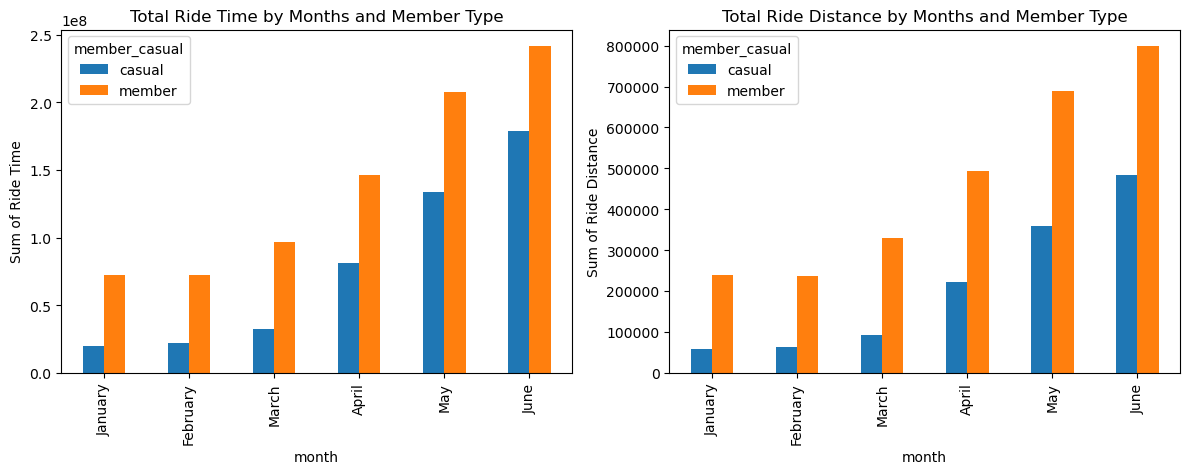

In [21]:
# Define the desired order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June']

# Reorder the 'month' column
cleaned_data['month'] = pd.Categorical(cleaned_data['month'], categories=month_order, ordered=True)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Monthly ride_time by member_type
ax1 = cleaned_data.groupby(['month', 'member_casual'])['ride_time_sec'].sum().unstack().plot(kind='bar', ax=axes[0])
ax1.set_title("Total Ride Time by Months and Member Type")
ax1.set_ylabel("Sum of Ride Time")

# Plot Monthly ride_distance by member_type
ax2 = cleaned_data.groupby(['month', 'member_casual'])['distance_km'].sum().unstack().plot(kind='bar', ax=axes[1])
ax2.set_title("Total Ride Distance by Months and Member Type")
ax2.set_ylabel("Sum of Ride Distance")

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

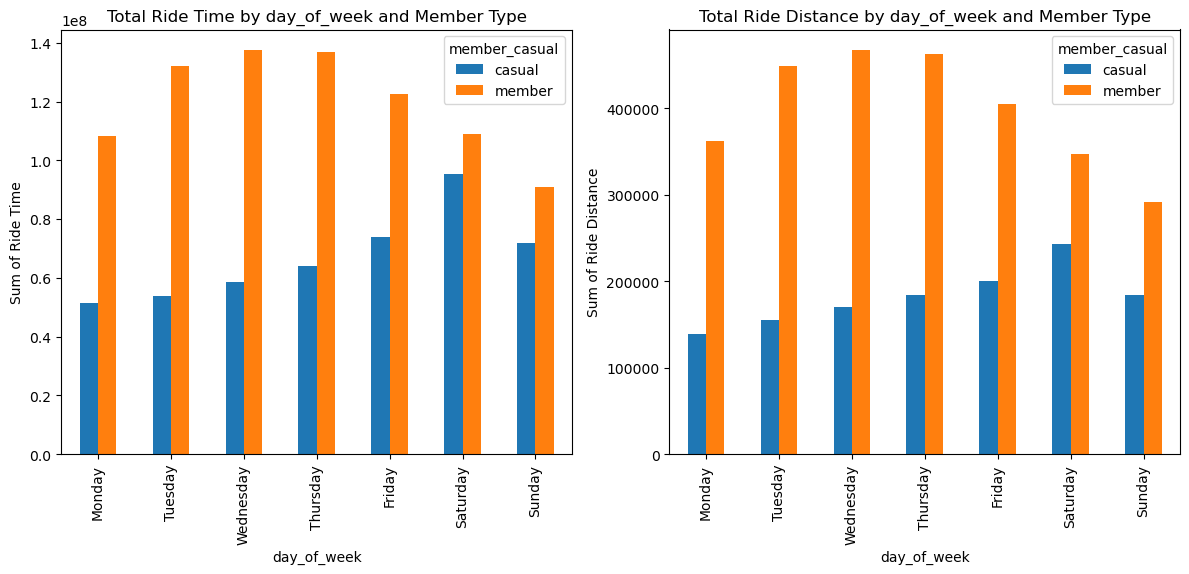

In [22]:
# Define the desired order of months
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the 'month' column
cleaned_data['day_of_week'] = pd.Categorical(cleaned_data['day_of_week'], categories=week_order, ordered=True)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot day_of_week ride_time by member_type
ax1 = cleaned_data.groupby(['day_of_week', 'member_casual'])['ride_time_sec'].sum().unstack().plot(kind='bar', ax=axes[0])
ax1.set_title("Total Ride Time by day_of_week and Member Type")
ax1.set_ylabel("Sum of Ride Time")

# Plot day_of_week ride_distance by member_type
ax2 = cleaned_data.groupby(['day_of_week', 'member_casual'])['distance_km'].sum().unstack().plot(kind='bar', ax=axes[1])
ax2.set_title("Total Ride Distance by day_of_week and Member Type")
ax2.set_ylabel("Sum of Ride Distance")

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


In [23]:
# Ride frequency, duration and distance Analysis
round(cleaned_data.groupby('member_casual').agg(
    ride_frequency=pd.NamedAgg(column='ride_time_sec', aggfunc='count'),
    avg_ride_duration=pd.NamedAgg(column='ride_time_sec', aggfunc='mean'),
    avg_ride_distance=pd.NamedAgg(column='distance_km', aggfunc='mean')
).reset_index().sort_values(by=['member_casual', 'ride_frequency'], ascending=[True, False]),2)

,member_casual,ride_frequency,avg_ride_duration,avg_ride_distance
0,casual,694112,675.63,1.84
1,member,1479141,566.36,1.88


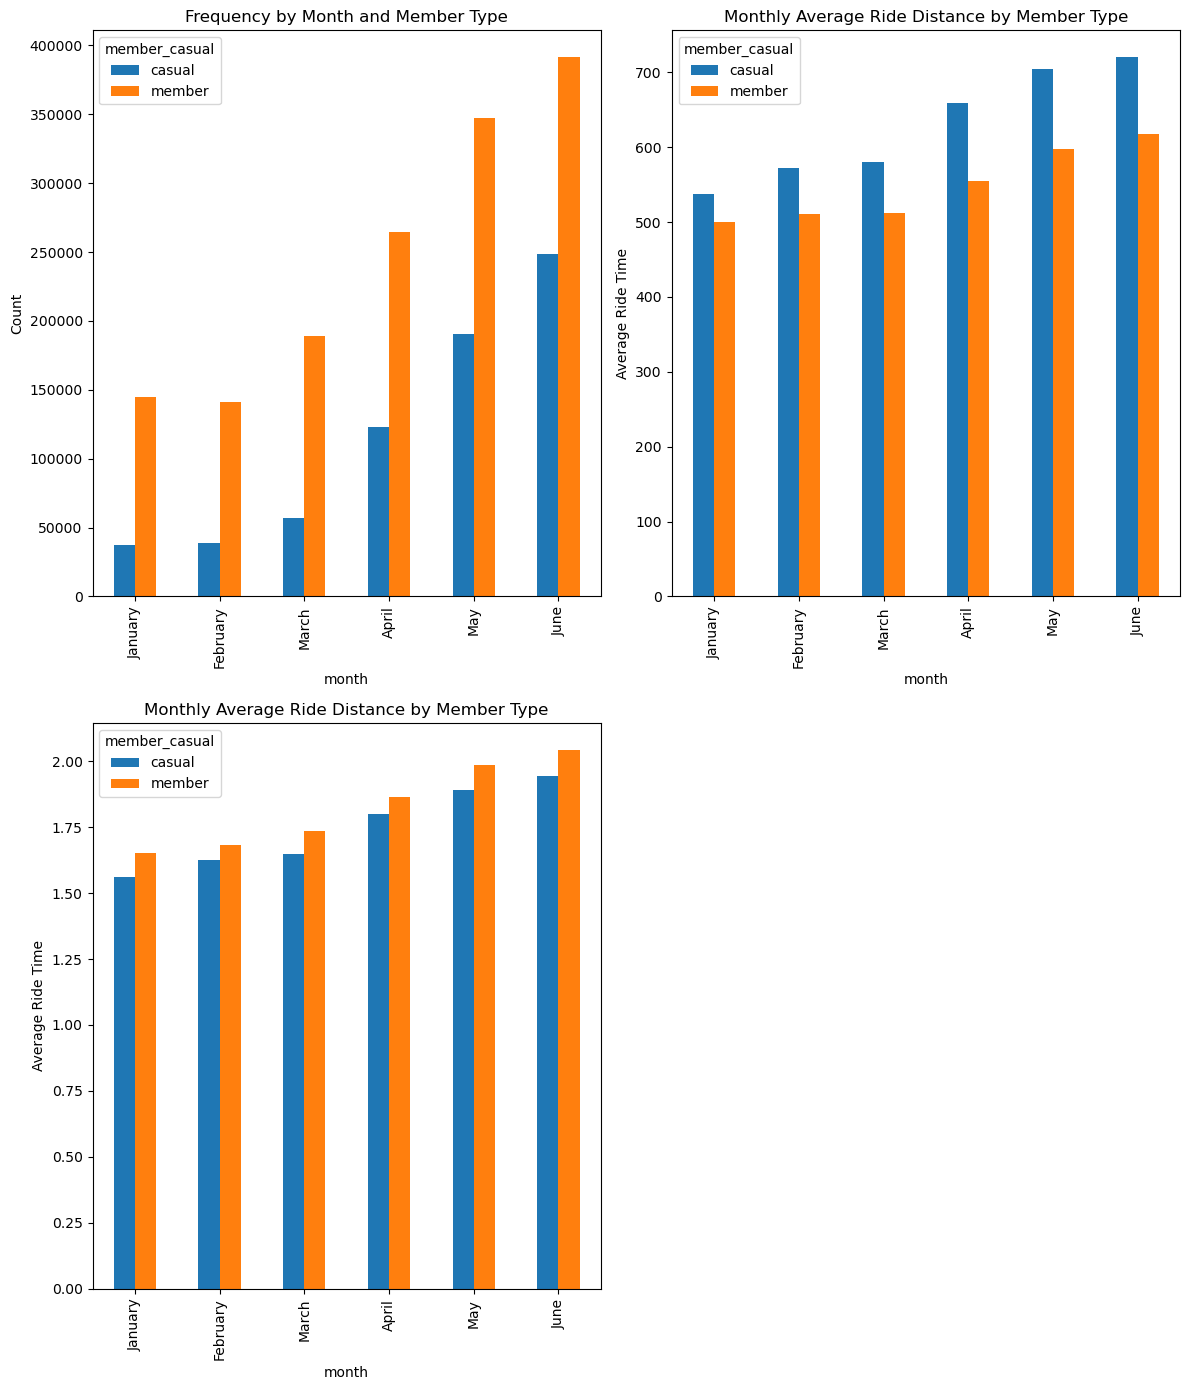

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 14))

# Plot of Ride_frequency in each month by member type 
ax1 = cleaned_data.groupby(['month', 'member_casual'])['member_casual'].size().unstack().plot(kind='bar', ax=axes[0,0])
ax1.set_title("Frequency by Month and Member Type")
ax1.set_ylabel("Count")

# Plot of Ride_time in each month by member type
ax2 = cleaned_data.groupby(['month', 'member_casual'])['ride_time_sec'].mean().unstack().plot(kind='bar', ax=axes[0,1])
ax2.set_title('Monthly Average Ride Distance by Member Type')
ax2.set_ylabel('Average Ride Time')

# Plot of Ride Distance in each month by member type
ax3 = cleaned_data.groupby(['month', 'member_casual'])['distance_km'].mean().unstack().plot(kind='bar', ax=axes[1,0])
ax3.set_title('Monthly Average Ride Distance by Member Type')
ax3.set_ylabel('Average Ride Time')

# Remove the empty subplot in the bottom right corner
fig.delaxes(axes[1, 1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

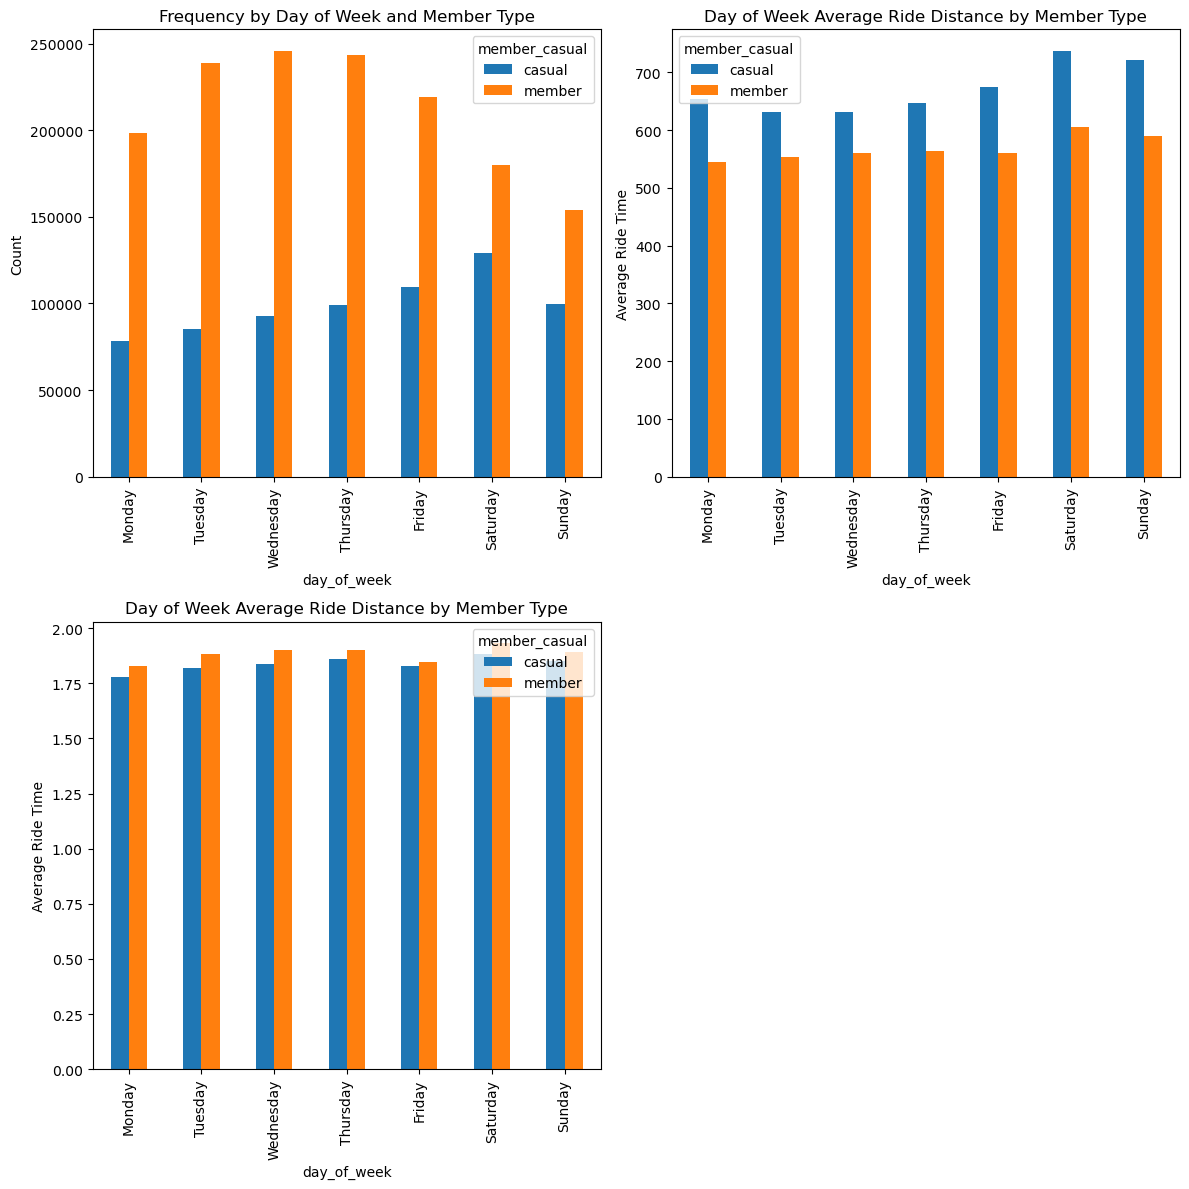

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot of Ride_frequency in each month by member type 
ax1 = cleaned_data.groupby(['day_of_week', 'member_casual'])['member_casual'].size().unstack().plot(kind='bar', ax=axes[0,0])
ax1.set_title("Frequency by Day of Week and Member Type")
ax1.set_ylabel("Count")

# Plot of Ride_time in each month by member type
ax2 = cleaned_data.groupby(['day_of_week', 'member_casual'])['ride_time_sec'].mean().unstack().plot(kind='bar', ax=axes[0,1])
ax2.set_title('Day of Week Average Ride Distance by Member Type')
ax2.set_ylabel('Average Ride Time')

# Plot of Ride Distance in each month by member type
ax3 = cleaned_data.groupby(['day_of_week', 'member_casual'])['distance_km'].mean().unstack().plot(kind='bar', ax=axes[1,0])
ax3.set_title('Day of Week Average Ride Distance by Member Type')
ax3.set_ylabel('Average Ride Time')

# Remove the empty subplot in the bottom right corner
fig.delaxes(axes[1, 1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

<Axes: xlabel='rideable_type'>

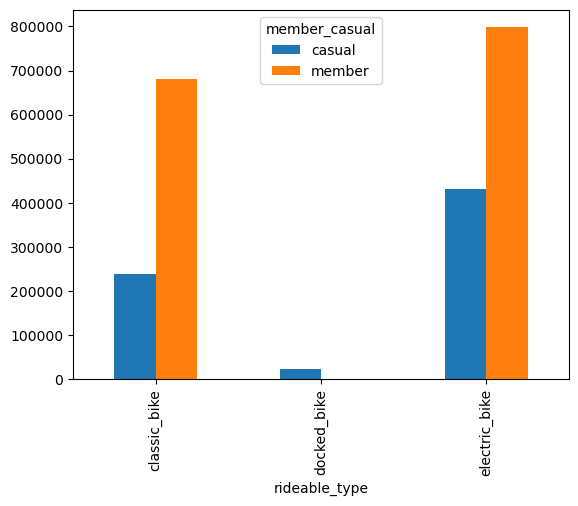

In [26]:
# Bike preferences of member_casual riders
cleaned_data.groupby(['rideable_type','member_casual']).size().unstack().plot(kind='bar')

In [27]:
cleaned_data.head()

,rideable_type,member_casual,day_of_week,month,ride_time_sec,distance_km
0,electric_bike,member,Saturday,January,651.0,0.84
1,classic_bike,member,Tuesday,January,509.0,1.20
2,electric_bike,casual,Monday,January,794.0,3.54
3,classic_bike,member,Sunday,January,526.0,1.20
4,classic_bike,member,Thursday,January,919.0,1.20


## Phase 5: Share
In this phase we have to present our findings and suggestions to the stakeholders.
The key points of our analysis are:

* As a total, the member's ride distance and duration is twice as much as casual riders.
* There is a increase in ride duration increases from January to June and maximum at June for both the members and casual riders. So, company can gain more members when the duration is nearly achieving its peak. 
* The ride duration of members is more in work days than in weekends. But for casual riders there is steady increase in duration from Monday to Saturday and a slight drop on Sunday. This means that casual riders ride mostly near the weekends. So, an annual plan for weekends would be a great idea or a plan for 3-4 days a week.
* The members have less average ride duration but have more average ride distance. This means that they are better at riding or maybe they have better physique and stamina. This can be a plus point for our advertisement.
* The data shows that the first preference of both the members and casual riders is electric bikes and then classic bikes. Docked bikes rarely used. So, the picture on the advertisement can be of electric bikes and classic bikes as these bikes are mostly liked by the people.


## Phase 6: Act
In this step, the stakeholders take the decision to act on the findings and suggestion provided.